In [19]:
import cv2
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# backprojecting a depth image to a 3D point cloud in the camera coordinate frame
# input: depth with shape (H, W)
# input: intrinsic_matrix, a 3x3 matrix
# output: a point cloud, pcloud with shape (H, W, 3)
#TODO: implement this function: for each 2D coordinate x, its 3D location X = dK^-1x 
#      (x is a homogeneous coordinate, d is its depth value, K is the intrinsic matrix). See slide 26 in lecture 3.


def backproject(depth, intrinsic_matrix):
    height,width=depth.shape
    pcloud=np.zeros((height, width,3))

    for x in range(height):
        for y in range(width):
            h_c=np.array([y,x,1])
            d_v=depth[x, y]
            X=d_v*np.linalg.inv(intrinsic_matrix).dot(h_c)
            pcloud[x,y]=X
    return pcloud

intrinsic_matrix
[[618.01727295   0.         312.37695312]
 [  0.         618.00335693 232.37530518]
 [  0.           0.           1.        ]]
(37825, 3)


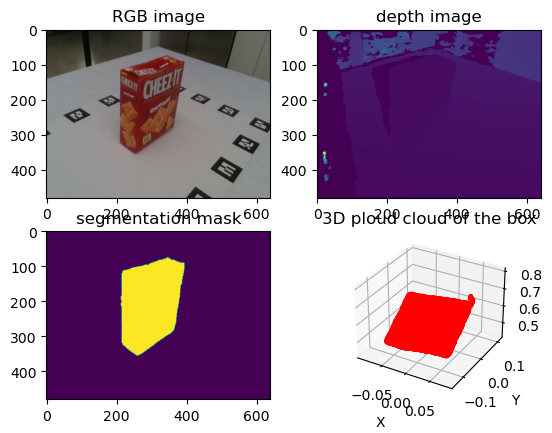

In [21]:
# main function
if __name__ == '__main__':

    # read the image in data
    # rgb image
    rgb_filename = 'data/000006-color.jpg'
    im = cv2.imread(rgb_filename)
    
    # depth image
    depth_filename = 'data/000006-depth.png'
    depth = cv2.imread(depth_filename, cv2.IMREAD_ANYDEPTH)
    # convert from mm to m
    depth = depth / 1000.0
    
    # read the mask image
    mask_filename = 'data/000006-label-binary.png'
    mask = cv2.imread(mask_filename)
    mask = mask[:, :, 0]
    
    # erode the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.erode(mask, kernel)
    
    # load matedata
    meta_filename = 'data/000006-meta.mat'
    meta = scipy.io.loadmat(meta_filename)
    
    # intrinsic matrix
    intrinsic_matrix = meta['intrinsic_matrix']
    print('intrinsic_matrix')
    print(intrinsic_matrix)
    
    # backprojection
    pcloud = backproject(depth, intrinsic_matrix)
        
    # get the points on the box
    pbox = pcloud[mask > 0, :]
    index = pbox[:, 2] > 0
    pbox = pbox[index]
    print(pbox.shape)
        
    # visualization for your debugging
    fig = plt.figure()
        
    # show RGB image
    ax = fig.add_subplot(2, 2, 1)
    plt.imshow(im[:, :, (2, 1, 0)])
    ax.set_title('RGB image')
        
    # show depth image
    ax = fig.add_subplot(2, 2, 2)
    plt.imshow(depth)
    ax.set_title('depth image')
        
    # show segmentation mask
    ax = fig.add_subplot(2, 2, 3)
    plt.imshow(mask)
    ax.set_title('segmentation mask')
        
    # up to now, suppose you get the points box as pbox
    # then you can use the following code to visualize the points in pbox
    # You shall see the figure in the homework assignment
    ax = fig.add_subplot(2, 2, 4, projection='3d')
    ax.scatter(pbox[:, 0], pbox[:, 1], pbox[:, 2], marker='.', color='r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D ploud cloud of the box')
                  
    plt.show()